# ⚡ 03c - Refined Energy Price Model Using SHAP-Filtered Features

This notebook retrains the energy price prediction model using only the most important features
based on SHAP analysis, and compares performance with the original full-feature model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

## 📦 Load Data and Engineer SHAP-Relevant Features

In [2]:
# Load cleaned dataset
df = pd.read_csv('../data/processed/merged_energy_data_final_step_1.csv', parse_dates=['utc_timestamp'])
df.set_index('utc_timestamp', inplace=True)
df = df.sort_index()

# Feature engineering (same base as original model)
df['price_lag_1h'] = df['Price (EUR/MWhe)'].shift(1)
df['price_lag_24h'] = df['Price (EUR/MWhe)'].shift(24)
df['price_lag_168h'] = df['Price (EUR/MWhe)'].shift(168)
df['hour'] = df.index.hour
df['solar_load_ratio'] = df['DE_solar_generation_actual'] / df['DE_load_actual_entsoe_transparency']
df['wind_load_ratio'] = df['DE_wind_generation_actual'] / df['DE_load_actual_entsoe_transparency']

## ✂️ SHAP-Filtered Feature Set

In [3]:
# SHAP-informed minimal features
features = [
    'price_lag_1h', 'price_lag_24h', 'price_lag_168h',
    'hour', 'DE_load_actual_entsoe_transparency',
    'wind_load_ratio', 'solar_load_ratio'
]

df_model = df[features + ['Price (EUR/MWhe)']].dropna()
X = df_model[features]
y = df_model['Price (EUR/MWhe)']

## 🧪 Train and Evaluate Refined Model

MAE (Refined): 2.09
RMSE (Refined): 3.53


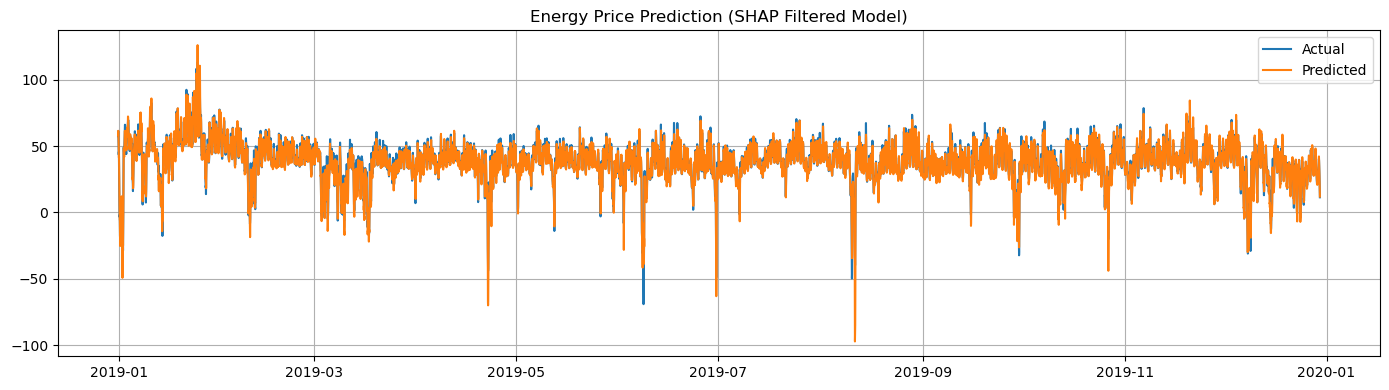

In [4]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train
model = XGBRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

print(f"MAE (Refined): {mae:.2f}")
print(f"RMSE (Refined): {rmse:.2f}")

# Plot
plt.figure(figsize=(14, 4))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title("Energy Price Prediction (SHAP Filtered Model)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Redid the price model experiment with less features to assesss what features to keep since future steps were computationally expensive </br>
Finished by Jad Akra on April 20th 2025